In [31]:
import numpy as np
import pandas as pd
import sympy as sym
from sympy import symbols, simplify, lambdify
from sympy.vector import CoordSys3D, matrix_to_vector
from matplotlib import pyplot as plt

from IPython.display import display

In [32]:
class Material:
    def __init__(self, Ms, gamma=5e8, alpha=0.018, Hkeff=6100.0, t=5e-9):
        self.Ms = Ms
        self.gamma = gamma
        self.alpha = alpha
        self.Hkeff = Hkeff
        self.t = t

        
class LayeredFilm:
    def __init__(self, layer1, layer2, J):
        self.l1 = layer1
        self.l2 = layer2
        self.J = J

In [33]:
mu0 = 1.2566370621219e-6

uB_SI = 9.274009994e-24 #J/T
uB_CGS = 9.274009994e-21 #erg/G

hb_SI = 1.054571817e-34 # J*s
hb_CGS = 1.054571817e-27 #erg*s

g0_SI = uB_SI/hb_SI #1/(T*s)
g0_CGS = uB_CGS/hb_CGS #1/(G*s)

layer1 = Material(800., gamma=2.2*g0_CGS, alpha=0.01, t=12e-7, Hkeff=6e6)
layer2 = Material(800., gamma=2.2*g0_CGS, alpha=0.01, t=12e-7, Hkeff=6e6)
film_inst = LayeredFilm(layer1, layer2, 3.6) #J=-3.6 erg/cm^2
H_val = 4.6e3
phi_val = np.deg2rad(63.0)

In [34]:
S = CoordSys3D('S')

M1, M2, H = symbols("M1 M2 H")
tet1, tet2, phi = symbols("theta1 theta2 phi")
Ku, J = symbols("K_u J")
t1, t2 = symbols("t1 t2")
Ev1 = \
    -H*M1*sym.cos(phi - tet1) + \
    2*sym.pi*(M1**2)*(sym.cos(tet1)**2) + \
    Ku*(sym.sin(tet1)**2)

Ev2 = \
    -H*M2*sym.cos(tet2 - phi) + \
    2*sym.pi*(M2**2)*(sym.cos(tet2)**2) + \
    Ku*(sym.sin(tet2)**2)

display(Ev1)
display(Ev2)

Es = J*sym.cos(tet2 - tet1) + t1*Ev1 + t2*Ev2

varset = (
    M1, M2,
    H, phi,
    t1, t2,
    Ku, J,
    tet1, tet2
)
Es_lamb = lambdify(varset, Es, 'numpy')

display(Es)

-H*M1*cos(phi - theta1) + K_u*sin(theta1)**2 + 2*pi*M1**2*cos(theta1)**2

-H*M2*cos(phi - theta2) + K_u*sin(theta2)**2 + 2*pi*M2**2*cos(theta2)**2

J*cos(theta1 - theta2) + t1*(-H*M1*cos(phi - theta1) + K_u*sin(theta1)**2 + 2*pi*M1**2*cos(theta1)**2) + t2*(-H*M2*cos(phi - theta2) + K_u*sin(theta2)**2 + 2*pi*M2**2*cos(theta2)**2)

In [58]:
N = 1000
ang1 = np.linspace(0, phi_val, N)
ang2 = np.linspace(phi_val, np.pi, N)

Es_val = np.zeros((N, N))
for i in range(len(ang1)):
    Es_val[i] = Es_lamb(
        film_inst.l1.Ms, film_inst.l2.Ms,
        H_val, phi_val, 
        film_inst.l1.t, film_inst.l2.t,
        film_inst.l1.Hkeff, film_inst.J,
        ang1[i], ang2
    )



<IPython.core.display.Javascript object>


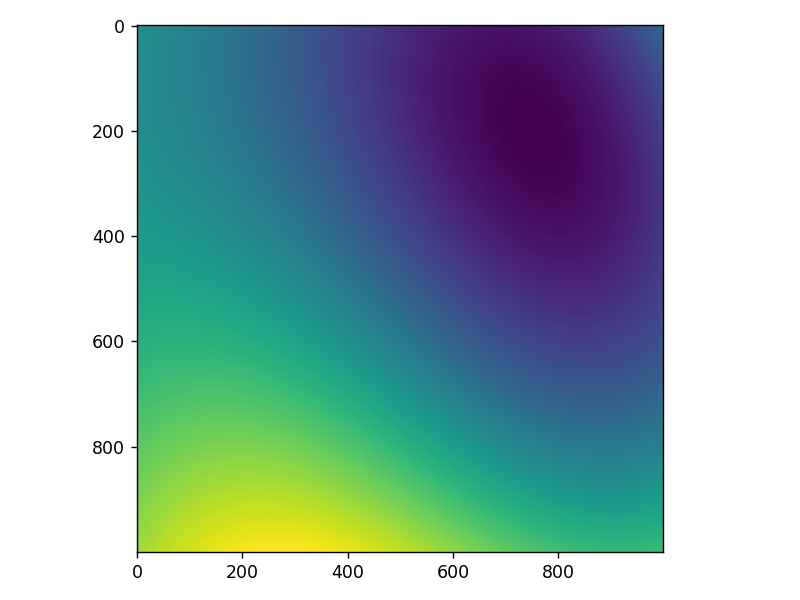

In [59]:
%matplotlib notebook

fig, ax = plt.subplots()
im = ax.imshow(Es_val)

fig.tight_layout()
plt.show()

In [60]:
ind = np.unravel_index(Es_val.argmin(), Es_val.shape)
print(np.rad2deg([ang1[ind[0]], ang2[ind[1]]]))

[ 12.54954955 150.83783784]
